In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neural_network import MLPRegressor
from datetime import datetime
import shap

In [2]:
exec(open("../../header.py").read())

In [3]:
folder = 'boston'

In [4]:
X = pd.read_csv(processed_root(f'{folder}/X.csv'))
y = pd.read_csv(processed_root(f'{folder}/y.csv'))

In [5]:
mlp = MLPRegressor()
mlp.fit(X, y.iloc[:,0])

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


MLPRegressor()

In [6]:
mlp.score(X, y)

0.5283295952807392

In [7]:
shap_values = shap.KernelExplainer(mlp.predict, X).shap_values(shap.sample(X,10))

Using 506 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/10 [00:00<?, ?it/s]

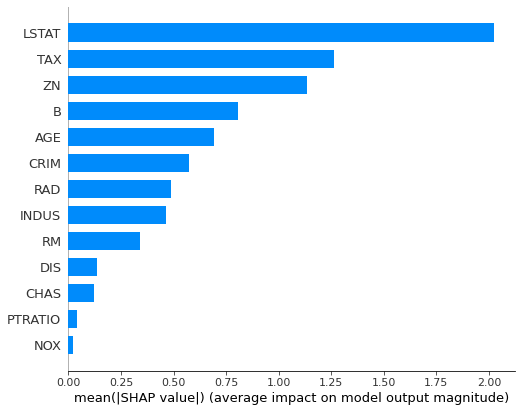

In [8]:
shap.summary_plot(shap_values, X, 
            plot_type = "bar")

In [9]:
vals = np.abs(shap_values).mean(0)

In [10]:
vals

array([0.57386994, 1.1320789 , 0.46375537, 0.12019645, 0.02251767,
       0.34043671, 0.69211282, 0.13695033, 0.48582811, 1.26318806,
       0.04101966, 0.80777407, 2.02158585])

In [11]:
fi_df = pd.DataFrame(list(zip(X.columns, vals)), 
                    columns=['Feature','Shapley Value']).\
                sort_values('Shapley Value', ascending = False).\
                reset_index().\
                drop(['index'], axis=1)


In [12]:
fi_df

,Feature,Shapley Value
0,LSTAT,2.021586
1,TAX,1.263188
2,ZN,1.132079
3,B,0.807774
4,AGE,0.692113
5,CRIM,0.573870
6,RAD,0.485828
7,INDUS,0.463755
8,RM,0.340437
9,DIS,0.136950
